# Bank Marketing Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data set

data_df = pd.read_csv('data/Bank-Telemarketing.csv')
print(data_df.shape)
print(data_df.columns)
data_df.head()

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# Exploratory Data Analysis

In [3]:
data_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
# review the distribution and quantiles of the data set

from pandas_profiling import ProfileReport
profile = ProfileReport(data_df, explorative=True)
profile

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# remove duplicate records

data_df.drop_duplicates(inplace=True)
print(data_df.shape)

(41176, 21)


In [6]:
# update the values from object >>> integer for the ML model

from sklearn import preprocessing

for i in data_df.columns:
    if data_df[i].dtype == 'object':
        feature = preprocessing.LabelEncoder()
        feature.fit(list(data_df[i].values))
        data_df[i] = feature.transform(list(data_df[i].values))

data_df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [7]:
data_df['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

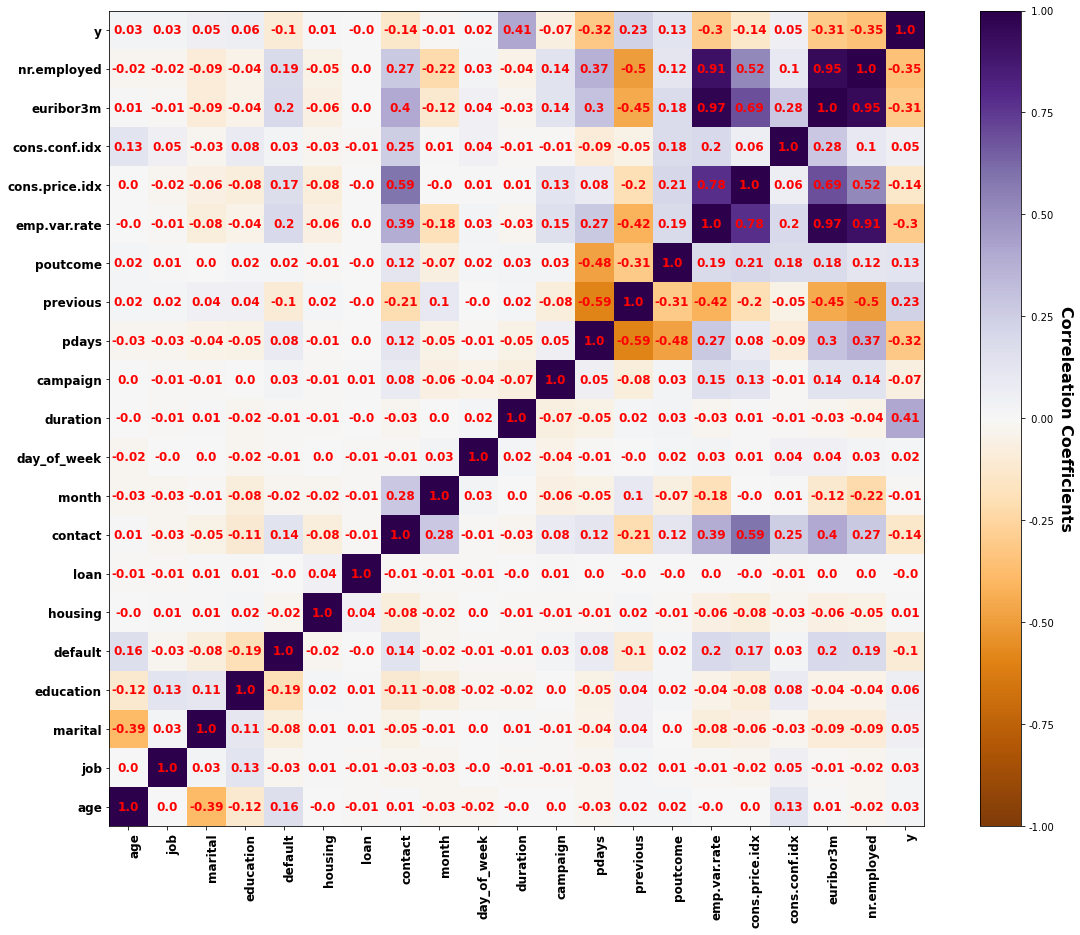

In [8]:
# correlation visualization 

model_corr = data_df.corr(method='pearson')

corr_matrix_array = model_corr.to_numpy()
corr_matrix = np.around(corr_matrix_array, decimals=2)

predictors = data_df.columns.tolist()

fig, ax = plt.subplots(figsize=(20,15))
im = ax.imshow(corr_matrix, cmap='PuOr', origin='lower')
im.set_clim(-1, 1)
ax.grid(False)
ax.set_xticks(np.arange(len(predictors)))
ax.set_yticks(np.arange(len(predictors)))
ax.set_xticklabels(predictors, size=12, weight='bold')
ax.set_yticklabels(predictors, size=12, weight='bold')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')

for i in range(len(predictors)):
    for j in range(len(predictors)):
        text = ax.text(j, i, corr_matrix[i, j], ha='center', va='center', color='red', size=12, weight='bold')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
cbar.ax.set_ylabel('Correleation Coefficients', rotation=-90, va='bottom', size=16, weight='bold')
plt.show()

In [24]:
# correlation cutoff was lowered to include additional features

corr_cutoff = 0.20
top_corrs = list(data_df.corr()[(data_df.corr() > corr_cutoff) | (data_df.corr() <- corr_cutoff)].y.dropna().index)
top_corrs

['duration',
 'pdays',
 'previous',
 'emp.var.rate',
 'euribor3m',
 'nr.employed',
 'y']

<AxesSubplot:>

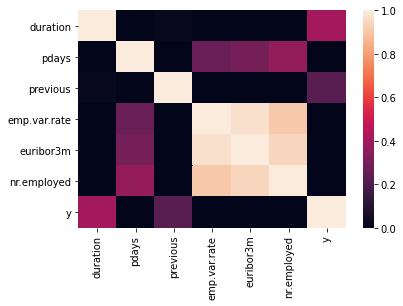

In [25]:
sns.heatmap(data_df[top_corrs].corr(),vmin=0)

In [27]:
X = data_df[top_corrs].drop('y',axis=1)
y = data_df['y']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:
# feature engineering

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Develop ML Models with Reproducibility 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

classification_models = [LogisticRegression(random_state = 10),
                         GaussianNB(),
                         SVC(probability=True, random_state = 10)]

In [31]:
# MLFlow for reproducibility

import mlflow
from azureml.core import Workspace

Failure while loading azureml_run_type_providers. Failed to load entrypoint automl = azureml.train.automl.run:AutoMLRun._from_run_dto with exception (cryptography 2.7 (/Users/cmartinez/anaconda3/lib/python3.7/site-packages), Requirement.parse('cryptography<4.0.0,>=3.3.1; extra == "crypto"'), {'PyJWT'}).


In [40]:
# login to Azure account

from azureml.core.authentication import InteractiveLoginAuthentication
import json

with open('configuration/azure_east_mlws_config.json') as file:
    config = json.load(file)
    interactive_auth=InteractiveLoginAuthentication(tenant_id = config['tenant_id'])
    ws = Workspace(subscription_id = config['subscription_id'],
                  resource_group = config['resource_group'],
                  workspace_name = config['workspace_name'],
                  auth = interactive_auth)
    
mlflow.set_tracking_uri(ws.get_mlflow_tracking_uri())

Note, we have launched a browser for you to login. For old experience with device code, use "az login --use-device-code"


Performing interactive authentication. Please follow the instructions on the terminal.
You have logged in. Now let us find all the subscriptions to which you have access...
Interactive authentication successfully completed.


In [41]:
# assign experiment name

experiment_name = 'Bank_Telemarketing_Classification_Experiment_with_MLFlow'

In [42]:
mlflow.set_experiment(experiment_name)

INFO: 'Bank_Telemarketing_Classification_Experiment_with_MLFlow' does not exist. Creating a new experiment


In [43]:
from mlflow.sklearn import log_model

In [49]:
# function for each classification model

def cl_model(model, run_name):
    model_type = type(model).__name__
    print(model_type)
    model.fit(X_train, y_train)

    run_name = model_type + '_Experiment'
    print(run_name,'\n')
    with mlflow.start_run(run_name=run_name) as run:

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        cfm = confusion_matrix(y_test, y_pred)
        
        print(cfm, '\n')

        cfm_df = pd.DataFrame(cfm, index = ["T", "F"], columns = ["T", "F"])
        plt.figure(figsize = (5,5))
        sns.heatmap(cfm_df, annot=True)
        figname = "Confusion_Matrix_" + model_type
        
        # log artifact
        
        plt.savefig(figname)
        mlflow.log_artifact(figname+".png")
        
        # create metrics
        acc_score = accuracy_score(y_test, y_pred)
       
        print(f'Accuracy Score: {acc_score}')

        # log metrics
        mlflow.log_metric('Accuracy', acc_score)
        
        # log model
        mlflow.sklearn.log_model(model, model_type + '-model')

        runID = run.info.run_uuid
        experimentID = run.info.experiment_id
        
        from datetime import datetime
        now = datetime.now() # current date and time
        datetime_str = now.strftime("%m%d%Y_%H%M%S")
        
        ml_run_name = 'Bank_Telemarketing_Classification_' + datetime_str
        print('ML run name: ', ml_run_name, '\n')
        
        run_name = ml_run_name
        
        print(f"Inside MLflow Run with run_id `{runID}` and experiment_id `{experimentID}`",'\n','\n')
        
    return run

LogisticRegression
LogisticRegression_Experiment 

[[7093  212]
 [ 575  356]] 

Accuracy Score: 0.9044439048081593
ML run name:  Bank_Telemarketing_Classification_06082021_234828 

Inside MLflow Run with run_id `162f2dfd-a141-4d46-98da-2b464266f514` and experiment_id `2b72f2c5-1531-4381-b473-530f0ac405a4` 
 

GaussianNB
GaussianNB_Experiment 

[[6750  555]
 [ 427  504]] 

Accuracy Score: 0.8807673627974745
ML run name:  Bank_Telemarketing_Classification_06082021_234831 

Inside MLflow Run with run_id `54bba38e-afe6-4936-b3a4-0e7f9e925e8d` and experiment_id `2b72f2c5-1531-4381-b473-530f0ac405a4` 
 

SVC
SVC_Experiment 

[[7095  210]
 [ 552  379]] 

Accuracy Score: 0.9074793589120933
ML run name:  Bank_Telemarketing_Classification_06082021_235150 

Inside MLflow Run with run_id `f8ec4bb5-5c45-4282-ae2d-376b76b50435` and experiment_id `2b72f2c5-1531-4381-b473-530f0ac405a4` 
 



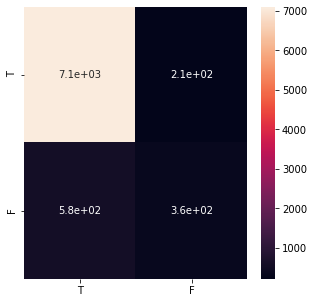

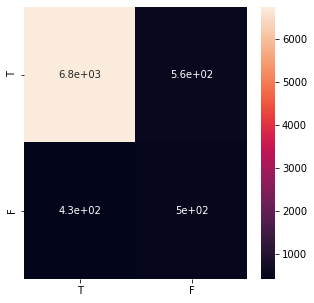

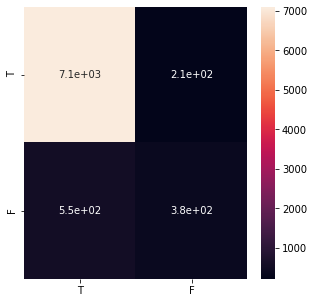

In [51]:
# run the experiment

for model in classification_models:
    cl_model(model, run_name)

In [52]:
# list the runs to identify the model

exp = ws.experiments[experiment_name]
runs = list(exp.get_runs())
runs

[Run(Experiment: Bank_Telemarketing_Classification_Experiment_with_MLFlow,
 Id: f8ec4bb5-5c45-4282-ae2d-376b76b50435,
 Type: None,
 Status: Completed),
 Run(Experiment: Bank_Telemarketing_Classification_Experiment_with_MLFlow,
 Id: 54bba38e-afe6-4936-b3a4-0e7f9e925e8d,
 Type: None,
 Status: Completed),
 Run(Experiment: Bank_Telemarketing_Classification_Experiment_with_MLFlow,
 Id: 162f2dfd-a141-4d46-98da-2b464266f514,
 Type: None,
 Status: Completed)]

In [53]:
runs[0]

Run(Experiment: Bank_Telemarketing_Classification_Experiment_with_MLFlow,
Id: f8ec4bb5-5c45-4282-ae2d-376b76b50435,
Type: None,
Status: Completed)

In [54]:
# download the SVM model

runs[0].download_files(output_directory='deployments/container')

# Build the Docker image to Azure Container Registry and Kubernetes cluster

In [67]:
!az login

The default web browser has been opened at https://login.microsoftonline.com/common/oauth2/authorize. Please continue the login in the web browser. If no web browser is available or if the web browser fails to open, use device code flow with `az login --use-device-code`.
You have logged in. Now let us find all the subscriptions to which you have access...
[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "f6912420-c3c7-45e0-82fe-a87ac66abae7",
    "id": "59f0e2db-909d-4c27-a8e6-1e69f46960d8",
    "isDefault": true,
    "managedByTenants": [],
    "name": "Azure subscription 1",
    "state": "Enabled",
    "tenantId": "f6912420-c3c7-45e0-82fe-a87ac66abae7",
    "user": {
      "name": "wildcat325@outlook.com",
      "type": "user"
    }
  }
]


In [68]:
!az acr login --name cis325registrydemofinal

Login Succeeded


In [72]:
from sh import cd, ls
cd('deployments/container')
print(ls())

Confusion_Matrix_SVC.png SVC-model                bankmarketing_aks.yaml
Dockerfile               api



In [73]:
!az acr build --image bankmarketingapi --registry cis325registrydemofinal --file Dockerfile . --resource-group acraksrg-final

Packing source code into tar to upload...
Uploading archived source code from '/var/folders/3k/_wq4dpkn09g76hqzch61tg580000gn/T/build_archive_0f18eded295c4128991ffbbd6f07a89d.tar.gz'...
Sending context (80.064 KiB) to registry: cis325registrydemofinal...
Queued a build with ID: ca1
Waiting for an agent...
Client-Request-ID=22f6c9fa-c939-11eb-b873-784f439c789d Retry policy did not allow for a retry: Server-Timestamp=Wed, 09 Jun 2021 15:41:19 GMT, Server-Request-ID=1ec0cb48-001e-0027-3a45-5d413c000000, HTTP status code=404, Exception=The specified blob does not exist. ErrorCode: BlobNotFound.
Client-Request-ID=230a11c2-c939-11eb-b873-784f439c789d Retry policy did not allow for a retry: Server-Timestamp=Wed, 09 Jun 2021 15:41:19 GMT, Server-Request-ID=1ec0cb4f-001e-0027-3e45-5d413c000000, HTTP status code=404, Exception=The specified blob does not exist. ErrorCode: BlobNotFound.
2021/06/09 15:41:20 Downloading source code...
2021/06/09 15:41:21 Finished downloading source code
2021/06/09 

  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
  Running setup.py bdist_wheel for pickle5: started
  Running setup.py bdist_wheel for pickle5: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
  Running setup.py bdist_wheel for pyrsistent: started
  Running setup.py bdist_wheel for pyrsistent: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/f0/b8/de/b593ad311be4eb458499d100db081e453576032272398b7ddc
Successfully built sklearn pickle5 pyrsistent
You are using pip version 18.1, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Removing intermediate container e40d65d426a6
 ---> 4a09dc8671e1
Step 8/8 : CMD python flaskAPI.py
 ---> Running in 2dd2273809c9
Removing intermediate container 2dd2273809c9
 ---> 0749892ec6fd
Successfully built 0749892ec6fd
Successfull

In [74]:
!az acr repository list --name cis325registrydemofinal

[
  "bankmarketingapi"
]


In [75]:
!az aks get-credentials --resource-group acraksrg-final --name cis325aksdemoclrfinal

Merged "cis325aksdemoclrfinal" as current context in /Users/cmartinez/.kube/config


In [76]:
!kubectl apply -f bankmarketing_aks.yaml

deployment.apps/bankmarketing-prediction created
service/bankmarketing-prediction created


In [77]:
!kubectl get service bankmarketing-prediction --watch

NAME                       TYPE           CLUSTER-IP    EXTERNAL-IP    PORT(S)          AGE
bankmarketing-prediction   LoadBalancer   10.0.21.178   20.62.216.77   5000:30412/TCP   72s


In [ ]:
# capture the External IP